In [60]:
# Use eigenimages to reconstruct a given project (projection number 1)
# MSE on projection vs reconstructed projection
# Repeat for 1000 images and calculate average mse
# Plot
# Repeat for however many components (100-5000)


In [61]:

#import stuff

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, img_as_float
from skimage.util import random_noise
from math import log10, sqrt
import mrcfile  
import random
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim


In [62]:
import mrcfile  

In [63]:
np.amax(a)

0.0046795243

In [64]:
#import file
with mrcfile.open("my_projection_stack.mrc") as mrc:
    a= mrc.data

print(a.shape)



(3498, 128, 128)


In [65]:
def load_image(image_path):
    image = img_as_float(io.imread(image_path, as_gray=True))
    return image


def apply_pca(image, n_components):
    pca = PCA(n_components=n_components)
    transformed_image = pca.fit_transform(image)
    return pca, transformed_image
    
def reconstruct_image(pca, transformed_image):
    reconstructed_image = pca.inverse_transform(transformed_image)
    return reconstructed_image

In [66]:
i = 10
MSE_Plot = dict()
Ssim_plot = dict()
explained_variance_plot = dict()
while (i<=3498):
    
    compressed, explained_variance = reconstructed_Image_Getter(i, a.shape[0], a.shape[1])
    val, new_val = avg_MSE(a, compressed)
    MSE_Plot[i] = val
    Ssim_plot[i] = new_val
    explained_variance_plot[i] = explained_variance
    
    i += 200
    

In [53]:
#get eigenimages
def reconstructed_Image_Getter(n_components, num_of_images, num_of_pixels):
    #reshape files so PCA can be done
    A=np.reshape(a,(num_of_pixels*num_of_pixels, num_of_images))
    
    pca, transformed =  apply_pca(A, n_components=n_components)
    e = pca.explained_variance_ratio_.sum()
    reconstructed = reconstruct_image(pca, transformed)
    
    return np.reshape(reconstructed, (num_of_images, num_of_pixels, num_of_pixels)), e

In [22]:
a[0].shape


(128, 128)

In [70]:
MSE_Plot

{10: 4.806903237764004e-08,
 210: 2.1128209532150778e-08,
 410: 1.5115480787919465e-08,
 610: 1.2075261384580926e-08,
 810: 9.692229067326252e-09,
 1010: 7.741638400560191e-09,
 1210: 6.01428410496041e-09,
 1410: 4.6206619273014835e-09,
 1610: 3.483984079677427e-09,
 1810: 2.5619039119018084e-09,
 2010: 1.8165114483714716e-09,
 2210: 1.194819809202663e-09,
 2410: 6.903882966424746e-10,
 2610: 2.92465098403194e-10,
 2810: 5.081493524398961e-11,
 3010: 1.0478605481575864e-11,
 3210: 3.5212039507055356e-12,
 3410: 5.368993689171047e-13}

In [43]:
#For loop repeat for 1000 images
def avg_MSE(data, reconstructed):
    total = 0
    new_total = 0
    data_range = (np.amax(a) - np.amin(a))
    for i in range(1000):
        ind = random. randint(0, a.shape[0] -1)
        adder = mean_squared_error(data[ind], reconstructed[ind]) #mse calculation
        new_total += ssim(data[ind], reconstructed[ind], data_range = data_range)
        total += adder
        
    return total/1000, new_total/1000

        

Text(0, 0.5, 'MSE')

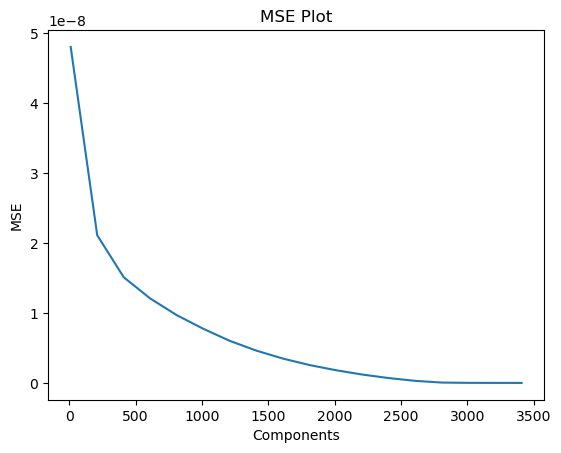

In [73]:
#plot 
plt.plot(MSE_Plot.keys(), MSE_Plot.values())
plt.title("MSE Plot")
plt.xlabel("Components")
plt.ylabel("MSE")

Text(0, 0.5, 'SSIM')

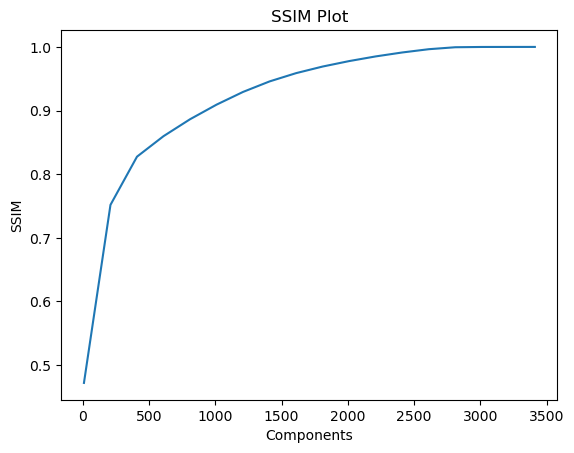

In [72]:
plt.plot(Ssim_plot.keys(), Ssim_plot.values())
plt.title("SSIM Plot")
plt.xlabel("Components")
plt.ylabel("SSIM")


Text(0, 0.5, 'Explained Variance')

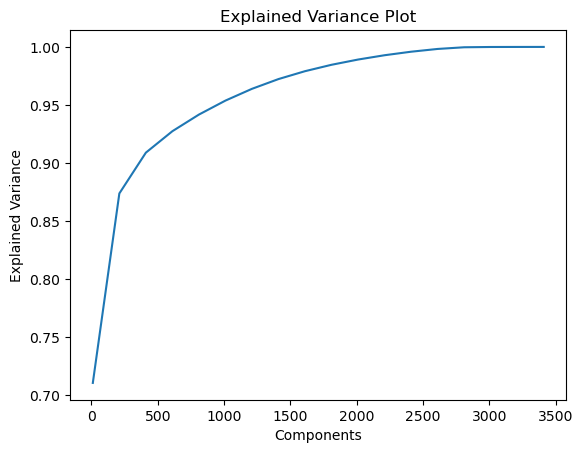

In [71]:
plt.plot(explained_variance_plot.keys(), explained_variance_plot.values())
plt.title("Explained Variance Plot")
plt.xlabel("Components")
plt.ylabel("Explained Variance")